# Examples ##

In [1]:
import numpy
from matplotlib import pyplot
from pycollect import GEDevice, GEDecode, database, measures

## Read RAW file ##
The **PyCollect** library include a set of prerecorded database for debug purposes.

In [2]:
for raw in database.RAWS_ABSPATH:
    print("RAW file path: {}".format(raw))

RAW file path: /usr/lib/python3.6/site-packages/pycollect-1.0-py3.6.egg/pycollect/database/db02.raw
RAW file path: /usr/lib/python3.6/site-packages/pycollect-1.0-py3.6.egg/pycollect/database/db00.raw
RAW file path: /usr/lib/python3.6/site-packages/pycollect-1.0-py3.6.egg/pycollect/database/db01.raw


Buffer size: 40000 bytes
Modules detected: ['INV-BP (p1)', 'INV-BP (p2)', 'ECG', 'NIBP', 'SpO2', 'NMT', 'ECG-EXTRA', 'ECG-ARRH', 'ECG-12', 'NMT2', 'ENTROPY']
Modules active: ['ECG', 'NIBP', 'SpO2', 'NMT', 'ECG-EXTRA', 'ECG-ARRH', 'ECG-12', 'NMT2', 'ENTROPY']
Trends: ['AA', 'AA ET', 'AA FI', 'AA MAC-SUM', 'AA2 MAC-AGE-SUM', 'AA: CLBR', 'AA: MNS', 'BAL-GAS ET', 'BAL-GAS FI', 'CO-WEDGE CO', 'CO-WEDGE CO-AGE', 'CO-WEDGE PCWP', 'CO-WEDGE PCWP-AGE', 'CO-WEDGE REF', 'CO-WEDGE TEMP', 'CO2 ET', 'CO2 FI', 'CO2 LBL', 'CO2 PAMB', 'CO2 RR', 'CO2: ALK', 'CO2: AP', 'CO2: CLBR', 'CO2: CS', 'CO2: MNS', 'CO2: OC', 'CO2: ZS', 'ECG HR', 'ECG HR-SRC', 'ECG IMP-RR', 'ECG LEAD-CH1', 'ECG LEAD-CH2', 'ECG LEAD-CH3', 'ECG ST1', 'ECG ST2', 'ECG ST3', 'ECG-12 LEAD-CH1', 'ECG-12 LEAD-CH2', 'ECG-12 LEAD-CH3', 'ECG-12 STAVF', 'ECG-12 STAVL', 'ECG-12 STAVR', 'ECG-12 STI', 'ECG-12 STII', 'ECG-12 STIII', 'ECG-12 STV1', 'ECG-12 STV2', 'ECG-12 STV3', 'ECG-12 STV4', 'ECG-12 STV5', 'ECG-12 STV6', 'ECG-ARRH HR', 'ECG-ARRH P

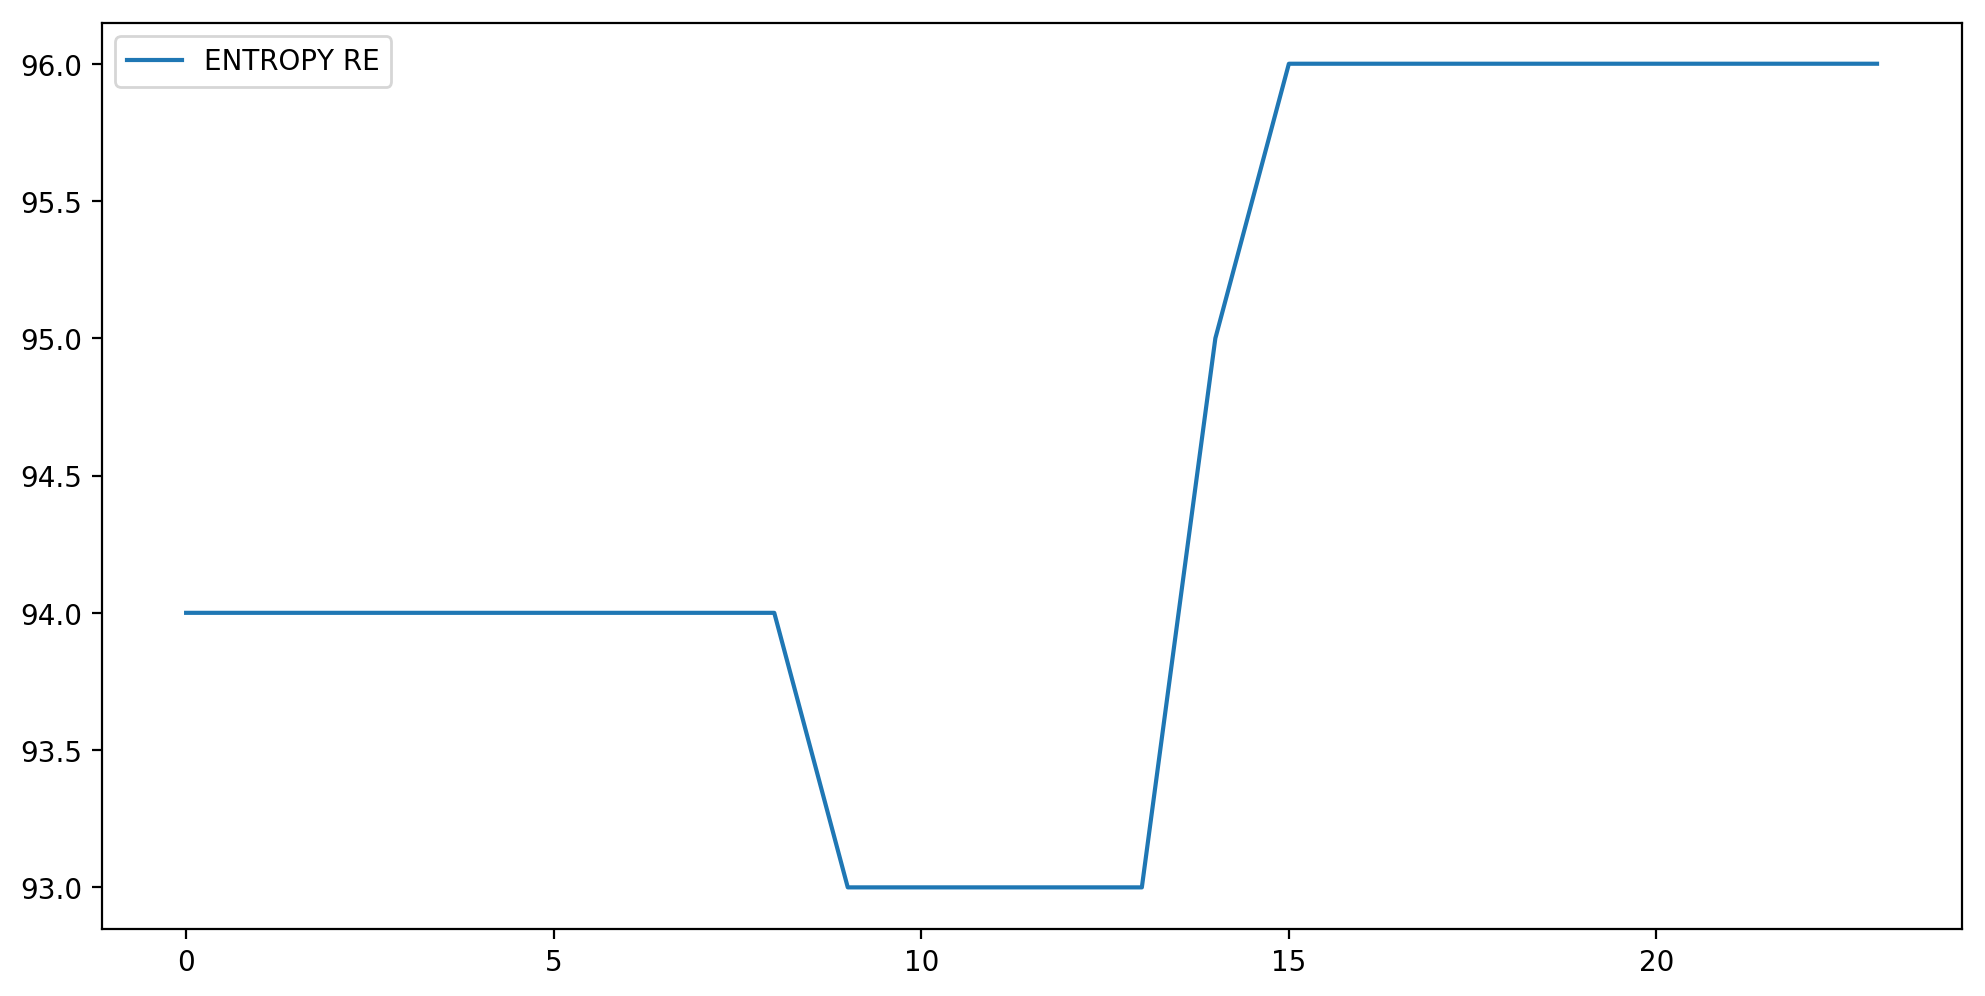

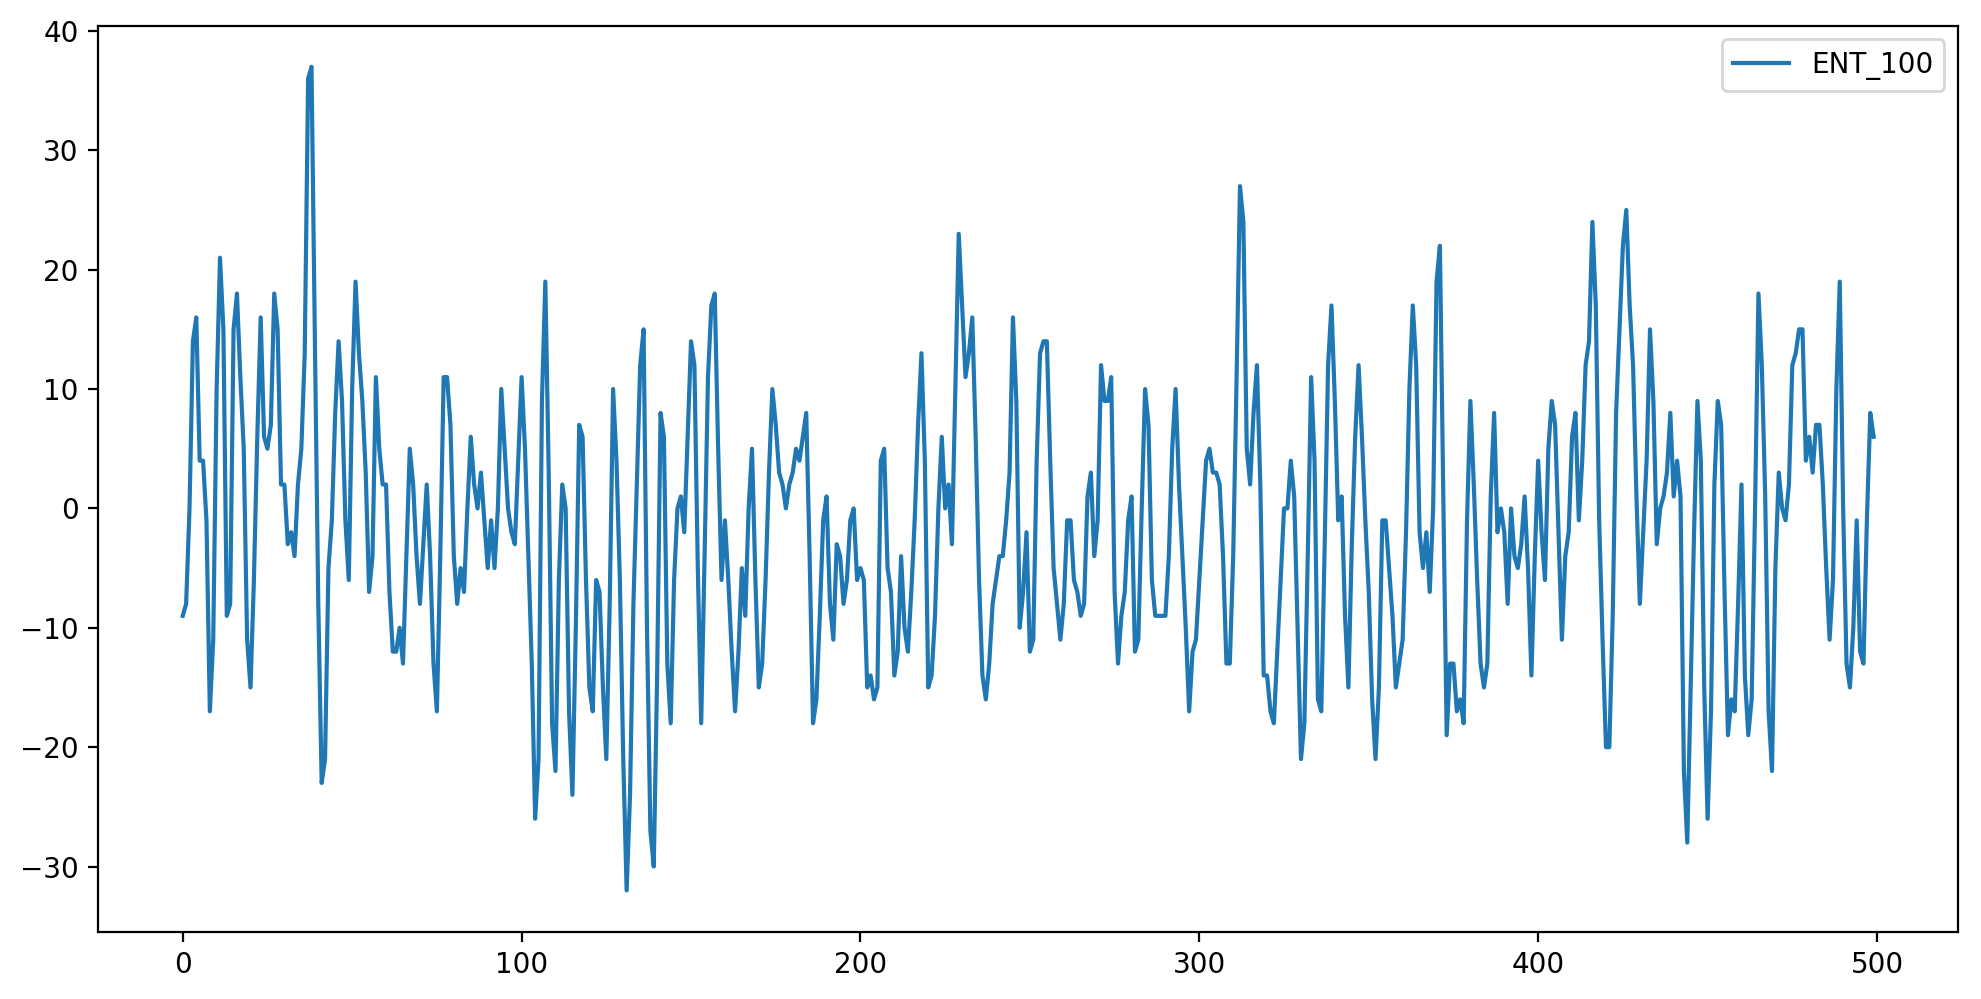

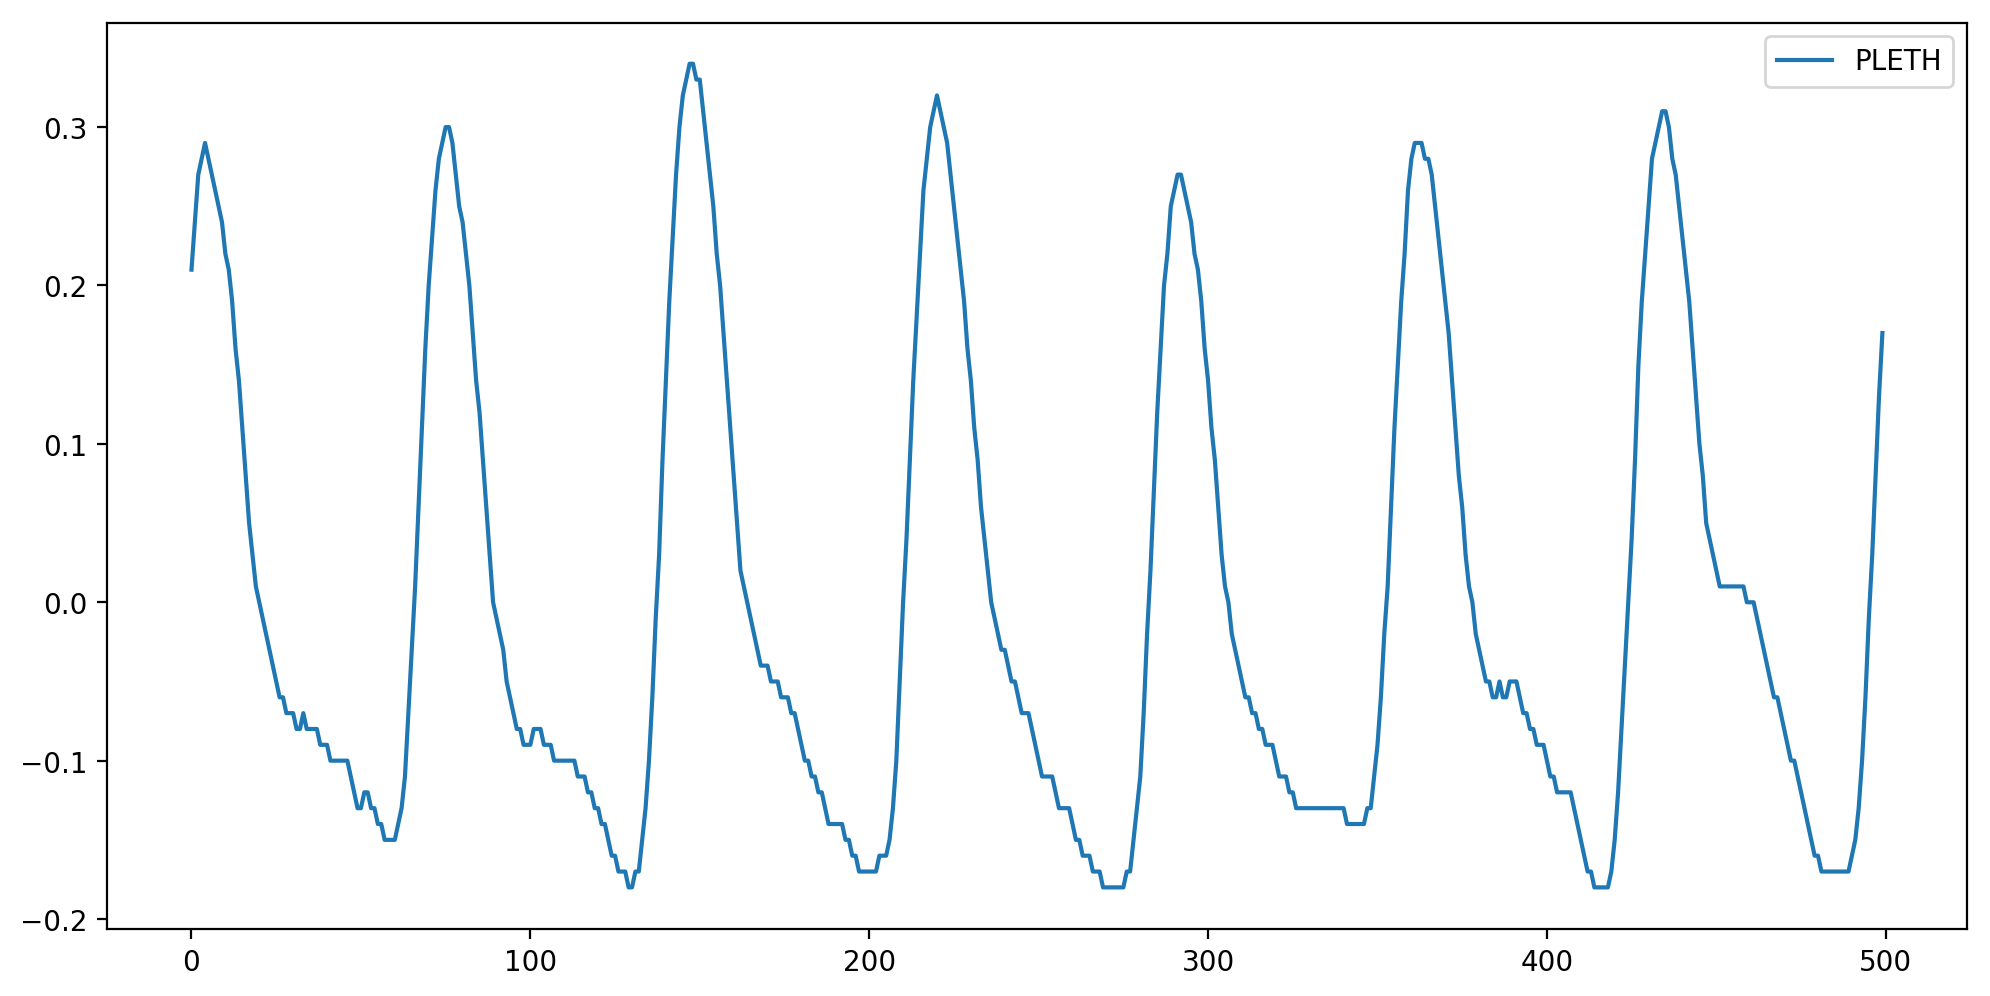

In [3]:
# Read the file
file = open(database.RAWS_ABSPATH[1], 'rb')
data = file.read()
data = data[:int(4e4)]
file.close()

decoder = GEDecode(data)

# Buffer and modules
print("Buffer size: {} bytes".format(len(decoder.BUFFER)))
print("Modules detected: {}".format(decoder.MODULES))
print("Modules active: {}".format(decoder.MODULES_ACTIVE))

# Available labels
print("Trends: {}".format(decoder.DATA_SUBRECORD.columns.tolist()))
print("Waves: {}".format(list(decoder.DATA_WAVE.keys())))

pyplot.figure(figsize=(12,6), dpi=200)
pyplot.plot(decoder.DATA_SUBRECORD['ENTROPY RE'])
pyplot.legend(['ENTROPY RE'])

pyplot.figure(figsize=(12,6), dpi=200)
pyplot.plot(decoder.DATA_WAVE['ENT_100']['values'][:500]) 
pyplot.legend(['ENT_100'])

pyplot.figure(figsize=(12,6), dpi=200)
pyplot.plot(decoder.DATA_WAVE['PLETH']['values'][:500])
pyplot.legend(['PLETH'])

## Read from monitor ##

In [4]:
device = GEDevice(database.RAWS_ABSPATH[0])
decoder = GEDecode(device.BUFFER)
# device.connect('/dev/ttyUSB0')

The monitor will send all ``subrecords`` data but the waves need an explicit request. 

In [5]:
default = device.DEFAULT_REQUEST
print("Default data requested: {}".format(default))

# Activate the trends transmission
device.request(subtype=device.DISPL)

# Activate the waves transmission
device.request(waveform_set=['ENT_100', 'PLETH'])

Default data requested: ['date', 'ENTROPY RE', 'ENTROPY SE', 'ENTROPY BSR', 'NIBP SYS', 'NIBP DIA', 'NIBP MEAN', 'ECG IMP-RR', 'ECG HR', 'TEMP (t1)', 'CO2 FI', 'CO2 ET', 'ECG1', 'ENT_100', 'PLETH']


In [6]:
# Start the asynchronous data collecting and process
device.collect(True)
decoder.process(True)

import time
time.sleep(20)

In [7]:
# Buffer and modules
print("Buffer size: {} bytes".format(len(decoder.BUFFER)))
print("Modules detected: {}".format(decoder.MODULES))
print("Modules active: {}".format(decoder.MODULES_ACTIVE))

# Available labels
print("Trends: {}".format(decoder.DATA_SUBRECORD.columns.tolist()))
print("Waves: {}".format(list(decoder.DATA_WAVE.keys())))

Buffer size: 17432 bytes
Modules detected: ['INV-BP (p1)', 'INV-BP (p2)', 'ECG', 'NIBP', 'SpO2', 'CO2', 'O2', 'N2O', 'AA', 'FLOW-VOL', 'ECG-EXTRA', 'ECG-ARRH', 'ECG-12', 'ENTROPY', 'FLOW-VOL2', 'BAL-GAS', 'AA2']
Modules active: ['ECG', 'NIBP', 'SpO2', 'CO2', 'O2', 'N2O', 'AA', 'FLOW-VOL', 'ECG-EXTRA', 'ECG-ARRH', 'ECG-12', 'ENTROPY', 'FLOW-VOL2', 'BAL-GAS', 'AA2']
Trends: ['AA', 'AA ET', 'AA FI', 'AA MAC-SUM', 'AA2 MAC-AGE-SUM', 'AA: CLBR', 'AA: MNS', 'BAL-GAS ET', 'BAL-GAS FI', 'CO-WEDGE CO', 'CO-WEDGE CO-AGE', 'CO-WEDGE PCWP', 'CO-WEDGE PCWP-AGE', 'CO-WEDGE REF', 'CO-WEDGE TEMP', 'CO2 ET', 'CO2 FI', 'CO2 LBL', 'CO2 PAMB', 'CO2 RR', 'CO2: ALK', 'CO2: AP', 'CO2: CLBR', 'CO2: CS', 'CO2: MNS', 'CO2: OC', 'CO2: ZS', 'ECG HR', 'ECG HR-SRC', 'ECG IMP-RR', 'ECG LEAD-CH1', 'ECG LEAD-CH2', 'ECG LEAD-CH3', 'ECG ST1', 'ECG ST2', 'ECG ST3', 'ECG-12 LEAD-CH1', 'ECG-12 LEAD-CH2', 'ECG-12 LEAD-CH3', 'ECG-12 STAVF', 'ECG-12 STAVL', 'ECG-12 STAVR', 'ECG-12 STI', 'ECG-12 STII', 'ECG-12 STIII', 'ECG-12 

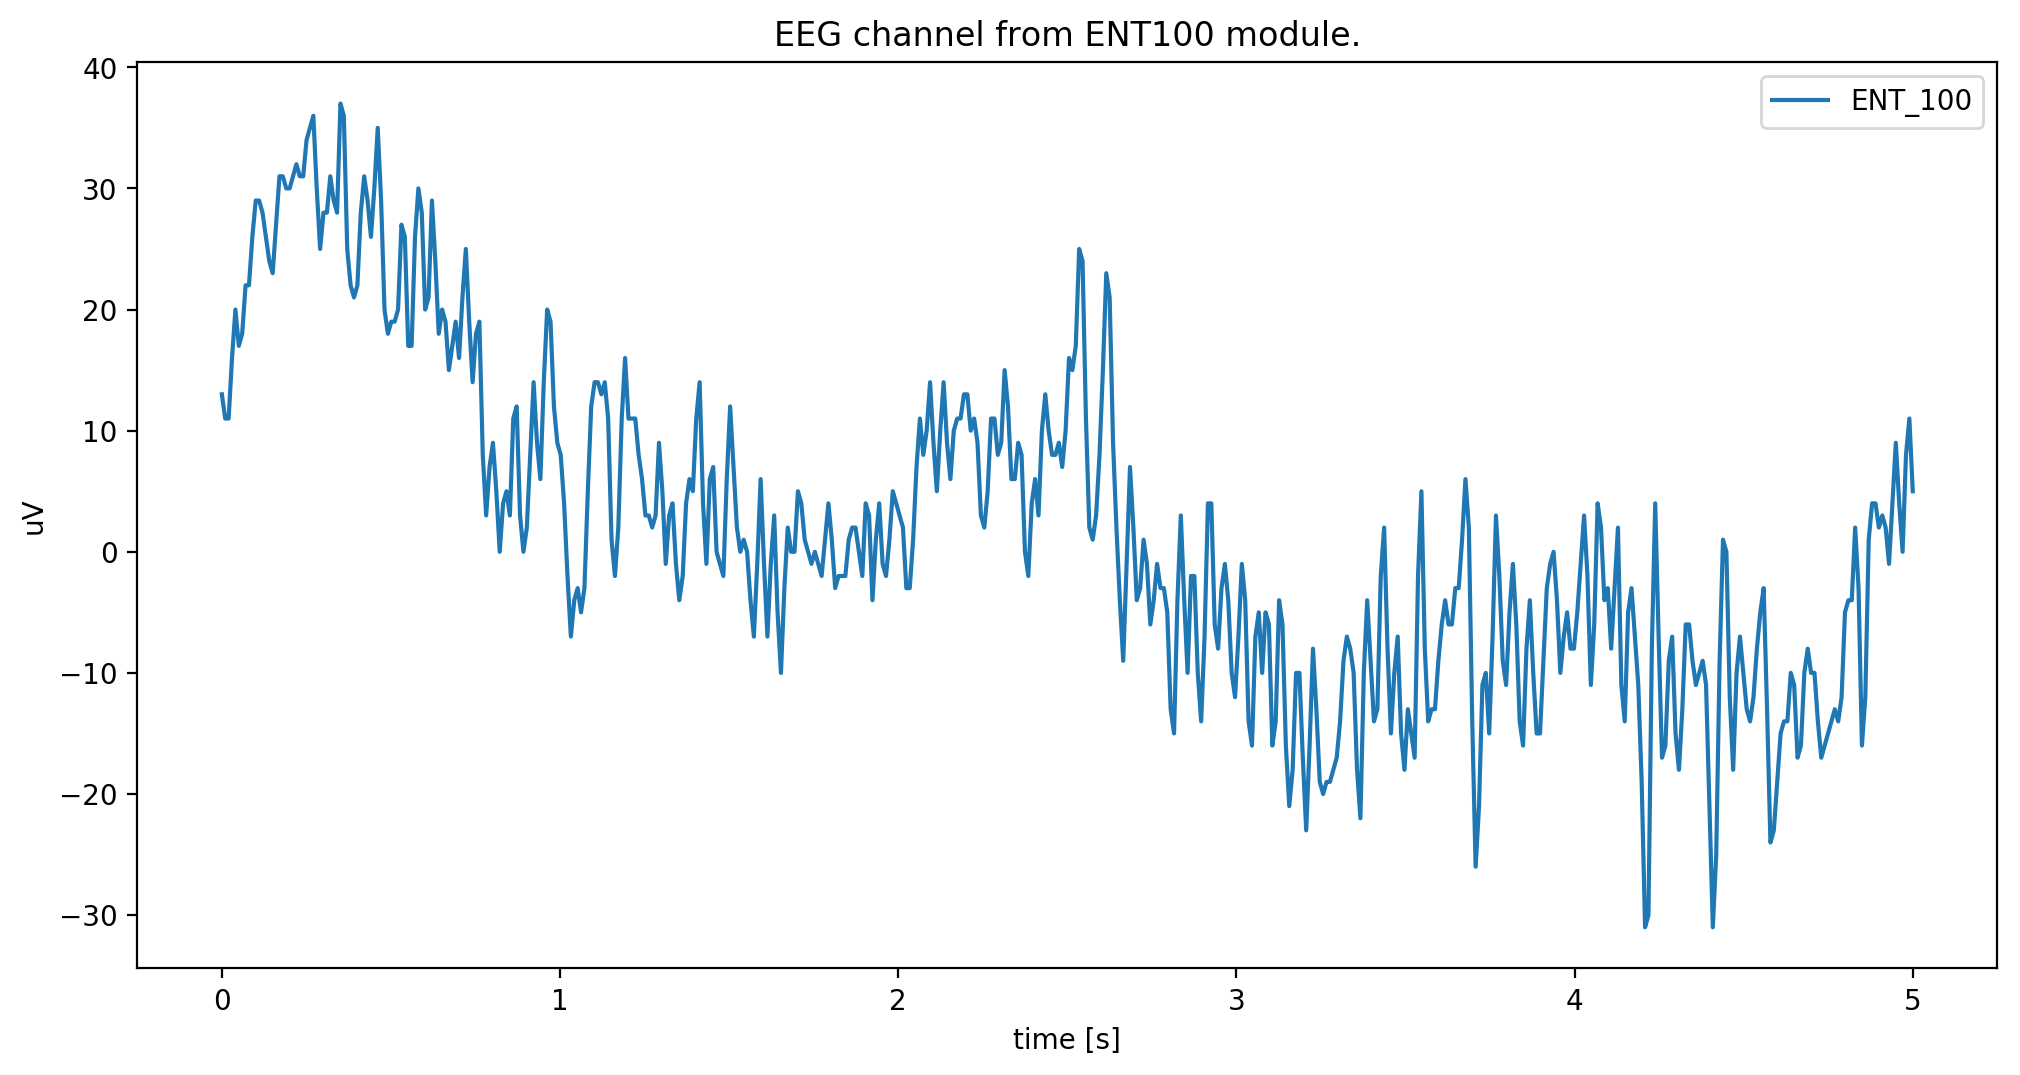

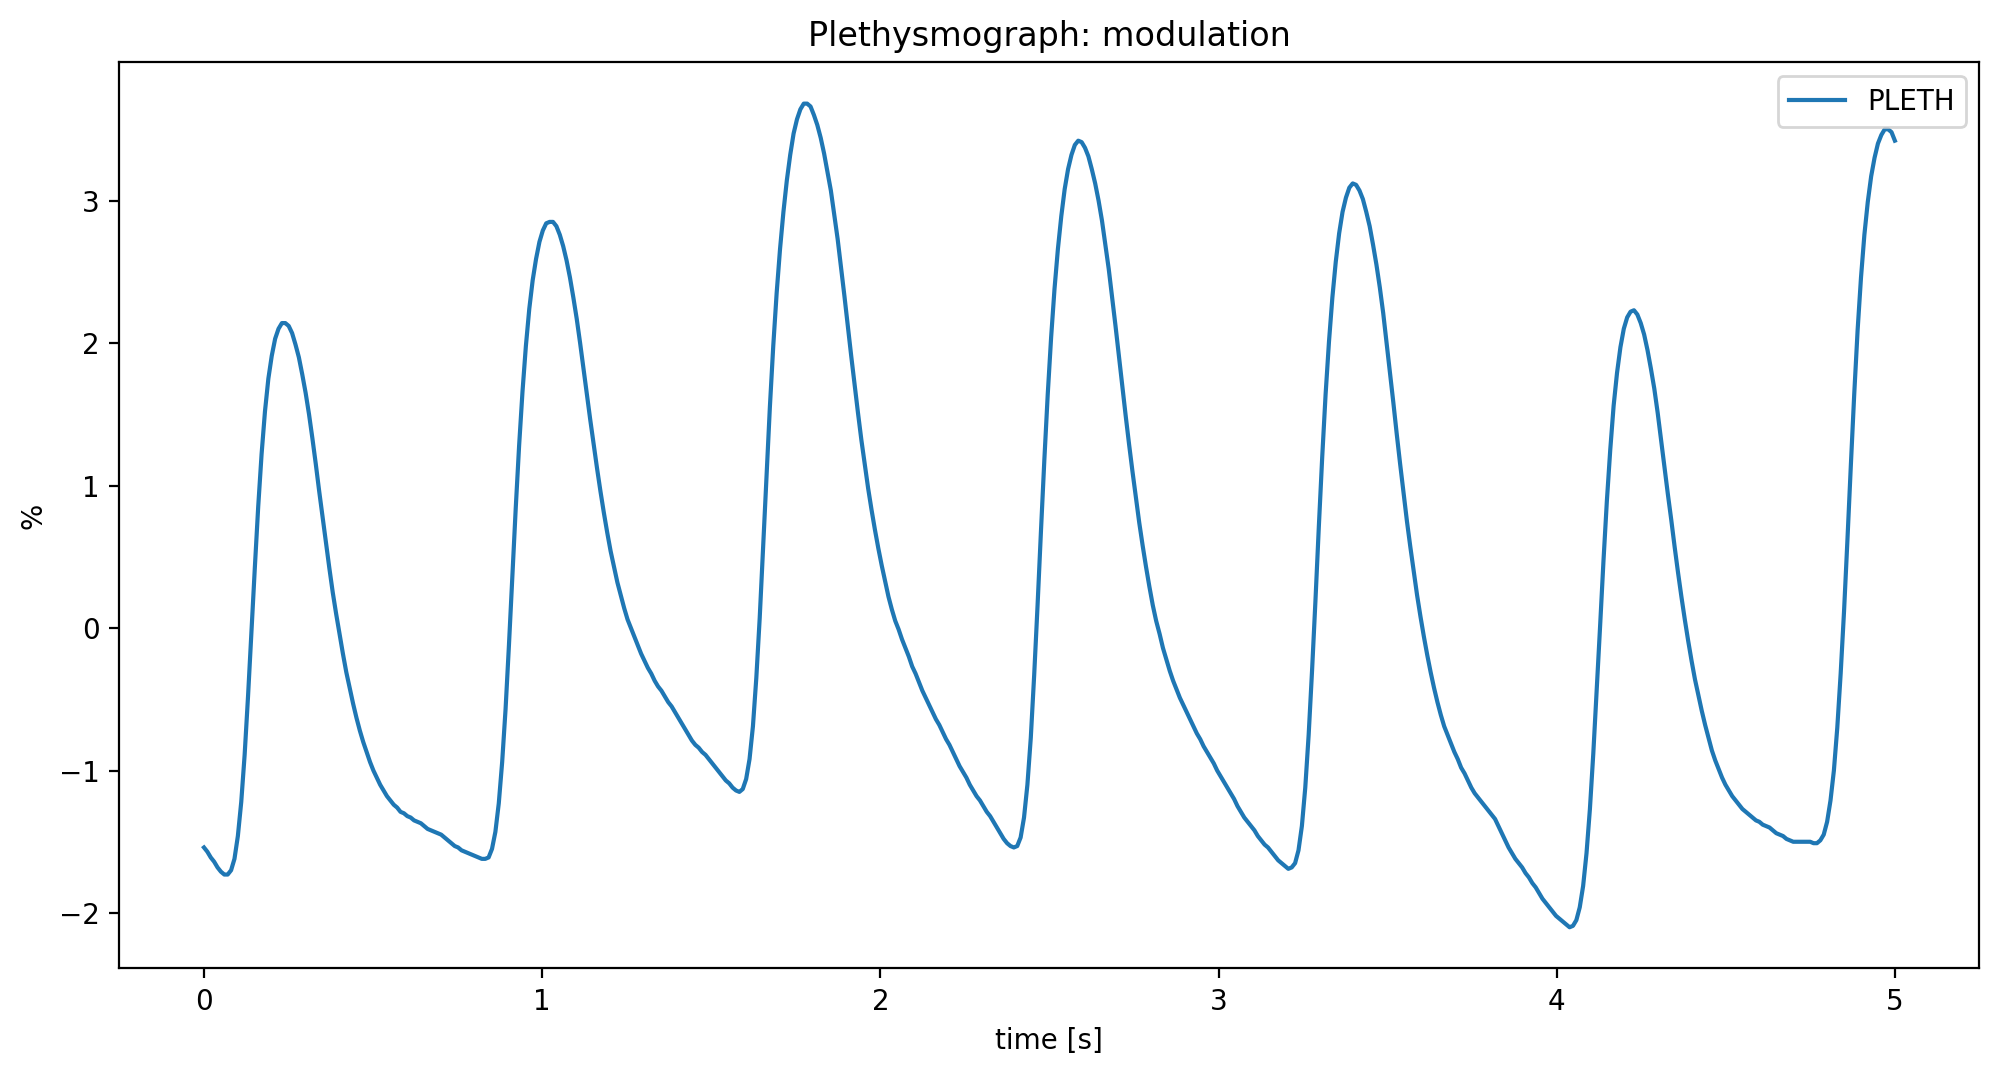

In [8]:
# pyplot.figure(figsize=(18,9), dpi=90)
# pyplot.plot(decoder.DATA_SUBRECORD['ENTROPY RE'])
# pyplot.legend(['ENTROPY RE'])

pyplot.figure(figsize=(12,6), dpi=200)
pyplot.plot(numpy.linspace(0, 5, 5*measures.WAVEFORMS_DICT['ENT_100']['samps']), decoder.DATA_WAVE['ENT_100']['values'][:500]) 
pyplot.title(measures.WAVEFORMS_DICT['ENT_100']['desc'])
pyplot.xlabel('time [s]')
pyplot.ylabel(measures.WAVEFORMS_DICT['ENT_100']['unit'])
pyplot.legend(['ENT_100'])

pyplot.figure(figsize=(12,6), dpi=200)
pyplot.plot(numpy.linspace(0, 5, 5*measures.WAVEFORMS_DICT['PLETH']['samps']), decoder.DATA_WAVE['PLETH']['values'][:500])
pyplot.title(measures.WAVEFORMS_DICT['PLETH']['desc'])
pyplot.xlabel('time [s]')
pyplot.ylabel(measures.WAVEFORMS_DICT['PLETH']['unit'])
pyplot.legend(['PLETH'])

## Save data ##
The data can be saved in two differents formats _RAW_, _SCV_ and _EDF+_.

#### Save data as CSV ###

In [9]:
decoder.save_as_csv('data_out');

#### Save data as EDF+ ###
The _edf_ format need extra patient information.

In [10]:
from datetime import datetime

decoder.set_edf_header(
    admincode = '',
    birthdate = datetime(1900, 1, 1).timestamp(), #datetime object
    equipment = '',
    gender = 0, #0 for male, 1 for female
    patientcode = '',
    patientname = '',
    patient_additional = '',
    recording_additional = '',
    technician = '',
)

decoder.save_as_edf('data_out');

#### Save RAW data ###

In [11]:
decoder.save_as_raw('raw');

## Channels information ##

List all labels.

In [12]:
subrecords = [g['label'] for g in measures.GROUPS]
print('All subrecords: {}'.format(subrecords))

waves = [g['label'] for g in measures.WAVEFORMS]
print('All waveforms: {}'.format(waves))

All subrecords: ['ECG HR', 'ECG ST1', 'ECG ST2', 'ECG ST3', 'ECG IMP-RR', 'ECG: MOD', 'ECG: ACT', 'ECG: ASY', 'ECG HR-SRC', 'ECG: NS', 'ECG: AR', 'ECG: LRN', 'ECG: PCR', 'ECG: CH1', 'ECG: CH2', 'ECG: CH3', 'ECG LEAD-CH1', 'ECG LEAD-CH2', 'ECG LEAD-CH3', 'INV-BP SYS', 'INV-BP DIA', 'INV-BP MEAN', 'INV-BP HR', 'INV-BP: MOD', 'INV-BP: ACT', 'INV-BP: ZR', 'INV-BP LBL', 'NIBP SYS', 'NIBP DIA', 'NIBP MEAN', 'NIBP HR', 'NIBP: MOD', 'NIBP: ACT', 'NIBP CUFF', 'NIBP: AUTO', 'NIBP: STAT', 'NIBP: MSR', 'NIBP: STASIS', 'NIBP: CLBR', 'NIBP: OLD', 'TEMP', 'TEMP: MOD', 'TEMP: ACT', 'TEMP LBL', 'SpO2', 'SpO2 PR', 'SpO2 IR-AMP', 'SpO2 [SO2|SaO2|SvO2]', 'SpO2: MOD', 'SpO2: ACT', 'SpO2 LBL', 'CO2 ET', 'CO2 FI', 'CO2 RR', 'CO2 PAMB', 'CO2: MOD', 'CO2: ACT', 'CO2: AP', 'CO2: CS', 'CO2: ZS', 'CO2: OC', 'CO2: ALK', 'CO2 LBL', 'O2 ET', 'O2 FI', 'O2: MOD', 'O2: ACT', 'CO2: CLBR', 'CO2: MNS', 'N2O ET', 'N2O FI', 'N2O: MOD', 'N2O: ACT', 'N2O: CLBR', 'N2O: MNS', 'AA ET', 'AA FI', 'AA MAC-SUM', 'AA: MOD', 'AA: ACT'

Get all measures from desired group.

In [13]:
group_aa = [g['label'] for g in measures.GROUPS_DICT['AA']]
print('All measures from group AA: {}'.format(group_aa))

All measures from group AA: ['AA ET', 'AA FI', 'AA MAC-SUM', 'AA: MOD', 'AA: ACT', 'AA: CLBR', 'AA: MNS', 'AA']


Inspect a single measure from subrecord or waveform.

In [14]:
# Information about ``AA ET`` (Subrecord)
print('AA ET: {}'.format(measures.LABEL_TO_DICT['AA ET']))

# Information about ``ECG1`` (Waveforms)
print('ECG1: {}'.format(measures.WAVEFORMS_DICT['ECG1']))

AA ET: {'label': 'AA ET', 'name': 'FeAA', 'desc': 'Anesthesia Agents ET', 'key': 'aa:et', 'unit': '%', 'shift': 0.01, 'subclass': 'basic'}
ECG1: {'label': 'ECG1', 'desc': '', 'unit': 'mV', 'shift_': 0.001, 'samps': 300, 'transducer': '', 'prefilter': '', 'physical_min': -0.001, 'physical_max': 0.001}


## Other control funtions ##

In [15]:
# Stop data tranfer from monitor
device.stop()

# Close serial port
device.close()

# Stop internal asynchronous process
device.collect(False)
decoder.process(False)

# Restart decode process
device.collect(True)
decoder.BUFFER = device.BUFFER  #Force reference 
decoder.process(True)

# Clear buffer, will require 'restart decode process'
device.clear_buffer()
decoder.clear_data()
decoder.clear_buffer()